In [27]:
import pandas as pd
import numpy as np

# 랜덤 시드 고정
# 랜덤 시드 : 난수(랜덤 수)생성기에서 경우의 고정시킬 때 사용
np.random.seed(0)

num_samples = 1000


data = {
    "수입": np.random.normal(loc=4000, scale=1000, size=num_samples),
    "지출": np.random.normal(loc=2000, scale=500, size=num_samples),
}

df = pd.DataFrame(data)

# 이상치 추가
num_outliers = 100

# 수입 열에 대한 이상치 추가
df.loc[np.random.choice(df.index, num_outliers), "수입"] = (
    df["수입"].mean() + 5 * df["수입"].std()
)
# 지출 열에 대한 이상치 추가
df.loc[np.random.choice(df.index, num_outliers), "지출"] = (
    df["지출"].mean() + 5 * df["지출"].std()
)

In [28]:
df.head()

,수입,지출
0,5764.052346,2277.981340
1,4400.157208,2446.236944
2,4978.737984,1788.842588
3,6240.893199,2052.357015
4,5867.557990,2114.026663


In [29]:
# "수입" 열에 대한 이상치 찾기

# 이상치 탐색 열 이름
column = "수입"

# 사분위수 확인
# 하위 25% 경계값
Q1 = df[column].quantile(0.25)
# 하위 75% 경계값 
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
IQR

1563.9075000925345

In [30]:
lower_bound = Q1 - 1.5 * IQR # 하한 계산

In [31]:
upper_bound = Q3 + 1.5 * IQR # 상한 계산

In [32]:
# 하한과 상한의 역할
# 조건식에서 비교 값
# 조건식 (condition) = 비교열, 비교연산자, 비교 값

In [33]:
lower_bound_filter = df[column] < lower_bound # 하한 조건식 

In [34]:
upper_bound_filter = df[column] > upper_bound

In [35]:
# 이상치 추출
outliers = df.loc[lower_bound_filter | upper_bound_filter, column]
outliers

24     8892.378521
28     8892.378521
30     8892.378521
34     8892.378521
38     8892.378521
          ...     
935    8892.378521
944    8892.378521
946    8892.378521
952    8892.378521
984    8892.378521
Name: 수입, Length: 99, dtype: float64

<Axes: >

C:\Users\guddk\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\guddk\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  func(*args, **kwargs)
C:\Users\guddk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guddk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


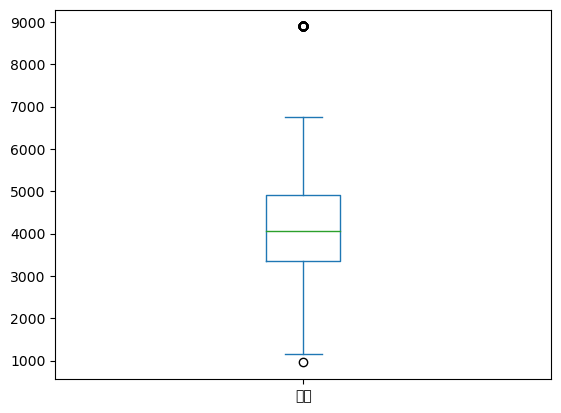

In [36]:
df["수입"].plot.box()

<Axes: xlabel='수입', ylabel='지출'>

C:\Users\guddk\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
C:\Users\guddk\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\guddk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guddk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


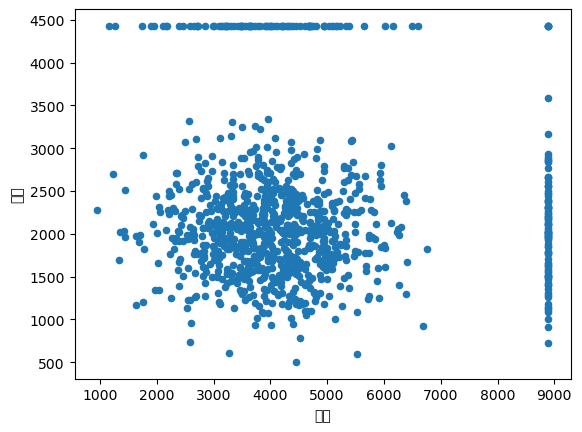

In [37]:
df.plot.scatter(x='수입',y='지출')

# 실습

In [49]:
import pandas as pd
import numpy as np

np.random.seed(0)

# 총 데이터 수
num_students = 10000

df = pd.DataFrame(
    {
        "나이": np.random.randint(20, 30, size=num_students),
        "학년": np.random.randint(1, 5, size=num_students),
        "학점": np.round(np.random.uniform(0, 5.0, size=num_students), 2),
    }
)

# 이상치 추가 수
num_outliers = 500

# 학점 열에 이상치 추가
outlier_indices_gpa = np.random.choice(df.index, num_outliers, replace=False)

df.loc[outlier_indices_gpa, "학점"] = np.round(
    np.random.uniform(0.0, 10.0, size=num_outliers), 2
)

<Axes: >

C:\Users\guddk\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  func(*args, **kwargs)
C:\Users\guddk\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  func(*args, **kwargs)
C:\Users\guddk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guddk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


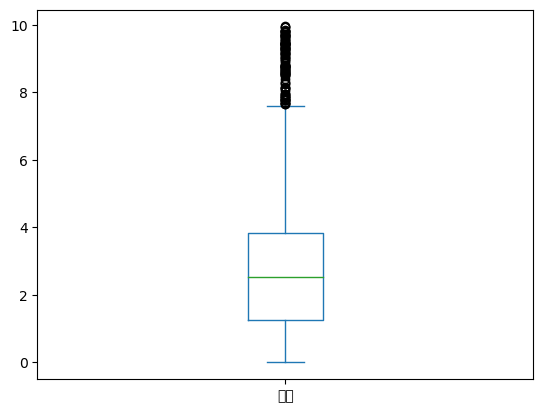

In [50]:
column = '학점'
df[column].plot.box()

In [51]:
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
IQR

2.55

In [53]:
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

lower_bound_filter = df[column] < lower_bound  
upper_bound_filter = df[column] > upper_bound  

df.loc[lower_bound_filter | upper_bound_filter, column]


21      9.69
154     9.56
266     9.20
271     9.27
357     7.76
        ... 
9215    7.77
9484    8.65
9545    8.70
9958    8.81
9994    9.74
Name: 학점, Length: 106, dtype: float64

In [54]:
df.loc[lower_bound_filter | upper_bound_filter, column] = df['학점'].mean()


In [57]:
condition1 = df['학점'] > 4.5
condition2 = df['학점'] < 1.0

df.loc[condition1 | condition2]

,나이,학년,학점
2,23,2,6.37
4,27,2,0.75
7,25,2,0.05
9,24,4,0.49
17,27,3,0.80
...,...,...,...
9985,21,1,4.85
9987,26,2,4.90
9993,24,3,0.29
9995,22,4,4.56
